# Imports

In [1]:
!pip install scikit-fuzzy
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=c9347773749909ce83c4eb22214a477b76ef5d61db34fc19eb7c66d7d8401f4f
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.5 MB/s eta 0:00:00
time: 421 µs (started: 2023-05-05 18:51:15 +00:00)


In [2]:
import numpy as np
import math
import skfuzzy as fuzzy
from skfuzzy import control as ctrl
import statistics
from numpy.random import default_rng

time: 760 ms (started: 2023-05-05 18:51:15 +00:00)


# Antecednets (Inputs) and Consequents (Outputs)

In [3]:
quality = ctrl.Antecedent(np.arange(0,101, 1), 'quality')
population_diversity = ctrl.Antecedent(np.arange(0,101,1),'population_diversity')

time: 1.25 ms (started: 2023-05-05 18:51:15 +00:00)


In [4]:
percentage = ctrl.Consequent(np.arange(0,101,1),'percentage')

time: 730 µs (started: 2023-05-05 18:51:15 +00:00)


# Membership Function

In [5]:
quality.automf(5,names=['very bad','bad','average','good', 'very good'])

population_diversity.automf(5,names=['very bad','bad','average','good', 'very good'])

time: 8.2 ms (started: 2023-05-05 18:51:15 +00:00)


In [6]:
percentage.automf(5,names=['very low','low','average','high', 'very high'])

time: 2.57 ms (started: 2023-05-05 18:51:15 +00:00)


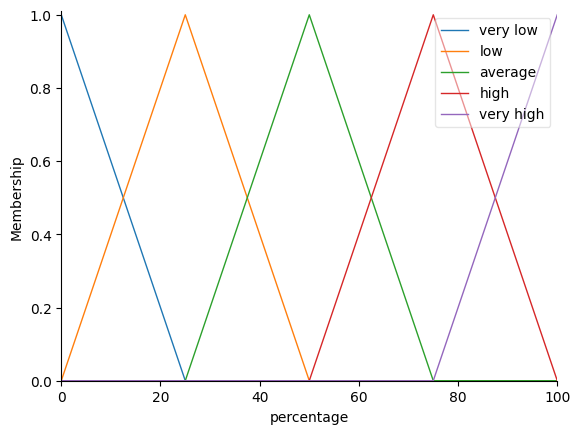

time: 696 ms (started: 2023-05-05 18:51:15 +00:00)


In [7]:
percentage.view()

In [8]:
rule1 = ctrl.Rule(quality['very bad'] & population_diversity['bad'], percentage['very high'])
rule2 = ctrl.Rule(quality['very bad'] & population_diversity['average'], percentage['very high'])
rule3 = ctrl.Rule(quality['very bad'] & population_diversity['good'], percentage['very high'])
rule4 = ctrl.Rule(quality['very bad'] & population_diversity['very good'], percentage['very high'])
rule5 = ctrl.Rule(quality['very bad'] & population_diversity['very bad'], percentage['very high'])

rule6 = ctrl.Rule(quality['bad'] & population_diversity['bad'], percentage['high'])
rule7 = ctrl.Rule(quality['bad'] & population_diversity['average'], percentage['high'])
rule8 = ctrl.Rule(quality['bad'] & population_diversity['good'], percentage['average'])
rule9 = ctrl.Rule(quality['bad'] & population_diversity['very good'], percentage['low'])
rule10 = ctrl.Rule(quality['bad'] & population_diversity['very bad'], percentage['high'])

rule11 = ctrl.Rule(quality['average'] & population_diversity['bad'], percentage['high'])
rule12 = ctrl.Rule(quality['average'] & population_diversity['average'], percentage['average'])
rule13 = ctrl.Rule(quality['average'] & population_diversity['good'], percentage['average'])
rule14 = ctrl.Rule(quality['average'] & population_diversity['very good'], percentage['low'])
rule15 = ctrl.Rule(quality['average'] & population_diversity['very bad'], percentage['high'])

rule16 = ctrl.Rule(quality['good'] & population_diversity['bad'], percentage['high'])
rule17 = ctrl.Rule(quality['good'] & population_diversity['average'], percentage['low'])
rule18 = ctrl.Rule(quality['good'] & population_diversity['good'], percentage['low'])
rule19 = ctrl.Rule(quality['good'] & population_diversity['very bad'], percentage['low'])
rule20 = ctrl.Rule(quality['good'] & population_diversity['very good'], percentage['very low'])

rule21 = ctrl.Rule(quality['very good'] & population_diversity['bad'], percentage['very low'])
rule22 = ctrl.Rule(quality['very good'] & population_diversity['average'], percentage['very low'])
rule23 = ctrl.Rule(quality['very good'] & population_diversity['good'], percentage['very low'])
rule24 = ctrl.Rule(quality['very good'] & population_diversity['very good'], percentage['very low'])
rule25 = ctrl.Rule(quality['very good'] & population_diversity['very bad'], percentage['very low'])

time: 3.46 ms (started: 2023-05-05 18:51:16 +00:00)


In [9]:
system_control = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11 ,rule12 ,rule13 ,rule14 ,rule15, rule16
                                     , rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25])

time: 429 ms (started: 2023-05-05 18:51:16 +00:00)


In [10]:
system = ctrl.ControlSystemSimulation(system_control)

time: 592 µs (started: 2023-05-05 18:51:17 +00:00)


In [11]:
system.input['quality'] = 100
system.input['population_diversity'] = 100
system.compute()

time: 35.1 ms (started: 2023-05-05 18:51:17 +00:00)


8.333333333333332


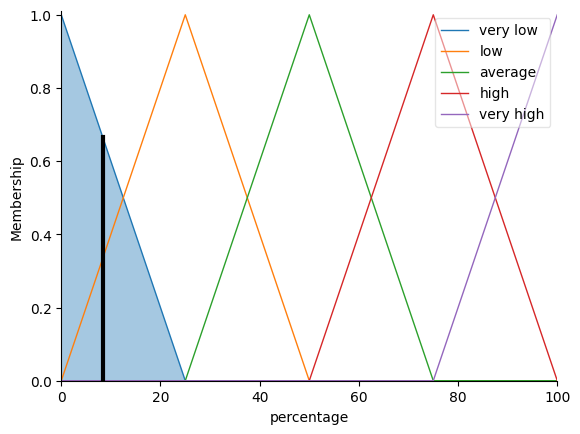

time: 380 ms (started: 2023-05-05 18:51:17 +00:00)


In [12]:
print(system.output['percentage'])
percentage.view(sim=system)

# Global Variables

In [13]:
POPULATION = []
NEW_POPULATION = []
length_population = 100
length_chromosome = 12
rate_crossover = 90

time: 681 µs (started: 2023-05-05 18:51:17 +00:00)


# Class

In [14]:
class Chromosome:
  score = 0
  
  def __init__(self,schema):
    self.schema = schema
  
  def __str__(self):
    toString = ''
    for ind in self.schema:
      toString += ind  
    return toString

time: 940 µs (started: 2023-05-05 18:51:17 +00:00)


# Selection

In [15]:
def selection(population, new_population):
  merged_list = []
  merged_list.extend(population)
  merged_list.extend(new_population)

  merged_list.sort(key=lambda schema: schema.score, reverse = True)

  return merged_list[:len(POPULATION)]

time: 1.19 ms (started: 2023-05-05 18:51:17 +00:00)


# Mutation

In [16]:
def population_diversity():
  array_population = []
  for i in POPULATION:
    array_population.append(str(i))
  
  return len(set(array_population))

time: 781 µs (started: 2023-05-05 18:51:17 +00:00)


In [17]:
def mutation(population):
  array = []
  PD = population_diversity()

  for ind in population:
    array_2 = []
    
    fitnees = (ind.score * 100) / length_chromosome
    system.input['quality'] = fitnees  # torna em porcentagem
    system.input['population_diversity'] = PD
    system.compute()
    percentage_mutation = system.output['percentage']

    for i,ind_schema in enumerate(ind.schema):
      yes = np.random.randint(0,100)
      if yes <= percentage_mutation:
        if ind_schema == '0':
          array_2.append('1')
        elif ind_schema == '1':
          array_2.append('0')
      else:
        array_2.append(ind_schema)
  
    array.append(Chromosome(array_2))

  return array

time: 1.18 ms (started: 2023-05-05 18:51:17 +00:00)


# CrossOver

In [18]:
def topParents(population):
  population.sort(key=lambda schema: schema.score, reverse = True)
  re = []

  for ind in population:
    re.append(ind.schema)

  return re[:25]

time: 768 µs (started: 2023-05-05 18:51:17 +00:00)


In [19]:
def crossOver(population):
  parents = topParents(population)

  while len(NEW_POPULATION) < length_population:
    father = parents[np.random.randint(0,len(parents))]
    mother = parents[np.random.randint(0,len(parents))] 

    probability_crossover = np.random.randint(0,100)

    if probability_crossover <= rate_crossover:
      if father != mother:
        child = []
        cut = np.random.randint(1,length_chromosome)
        child.append(father[:cut] + mother[cut:])
        child.append(mother[:cut] + father[cut:])
        
        for downward in child: 
          NEW_POPULATION.append(Chromosome(downward))

time: 1.12 ms (started: 2023-05-05 18:51:17 +00:00)


# Score

In [20]:
def score(population_test):
  for ind in population_test:
    ind.score= ind.schema.count('1')

time: 646 µs (started: 2023-05-05 18:51:17 +00:00)


# Init population

In [21]:
def random(): 
  array2 = []

  rng = default_rng()
  numbers = rng.choice(range(0, 2), size= 2, replace=False)
  
  array2.append(str(numbers[0]))
  array2.append(str(numbers[1]))
  
  return array2

time: 2.82 ms (started: 2023-05-05 18:51:17 +00:00)


In [22]:
def init_population(length_population,length_chromosome):
  for _ in range(length_population):
    array = []
    for _ in range(int(length_chromosome/2)):
      array.extend(random())
    POPULATION.append(Chromosome(array))

time: 1.18 ms (started: 2023-05-05 18:51:17 +00:00)


# Main

In [23]:
count = 0
array_generation = []
list_more_adaptado = []
array_diversity = []

while count < 1:
  flag = False
  generation = 0
  POPULATION.clear()
  NEW_POPULATION.clear()
  init_population(length_population, length_chromosome)

  while True:
    score(POPULATION)
    array_diversity.append(population_diversity())
    crossOver(POPULATION)
    score(NEW_POPULATION)
    NEW_POPULATION = mutation(NEW_POPULATION)
    score(NEW_POPULATION)
    POPULATION = selection(POPULATION,NEW_POPULATION)
    NEW_POPULATION.clear()
    
    if POPULATION[0].score == length_chromosome:
      flag = True

    if flag:
      print("===================================================================")
      print(f'Individual: {POPULATION[0].schema} and his score {POPULATION[0].score} generation {generation}')
      print("===================================================================")
      array_generation.append(generation)
      break
      
    generation += 1
  count += 1
  
print(f'average of 100 generations {statistics.mean(array_generation)}')

Individual: ['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1'] and his score 12 generation 2
average of 100 generations 2
time: 149 ms (started: 2023-05-05 18:51:17 +00:00)
